In [0]:
#basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

#machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, accuracy_score, roc_curve, auc, recall_score, precision_score, f1_score, precision_recall_curve
from sklearn.model_selection import StratifiedKFold,train_test_split,KFold
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import label_binarize
from sklearn import preprocessing

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import Lasso, LinearRegression, Ridge

from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier, XGBRegressor
from sklearn.ensemble import BaggingClassifier, BaggingRegressor
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.multiclass import OneVsRestClassifier

from sklearn.multioutput import MultiOutputClassifier
from sklearn.neighbors import KNeighborsClassifier

from catboost import Pool,CatBoostClassifier, CatBoostRegressor
import warnings

import shap
from pingouin import partial_corr

from sklearn.feature_selection import SelectKBest, chi2, f_classif

from math import pi

import lightgbm as lgb
import random

import operator
from functools import reduce

from sklearn.tree import DecisionTreeClassifier, export_graphviz, _tree
import graphviz
from dtreeviz.trees import dtreeviz

In [0]:
# import data
old_train = pd.read_csv("C:/Users/Meyke/WiDS/data/train.csv")
old_test = pd.read_csv("C:/Users/Meyke/WiDS/data/test.csv")

#
df = pd.read_csv("C:/Users/Meyke/WiDS/data/features_data_0502_imputed_star_rating_and_generous_building_id.csv")
df = df.set_index('id')

#rename
df.head()

,year_factor,state_factor,building_class,facility_type,floor_area,elevation,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,...,binned_calc_eui_20,verschil_uitstoot_per_temp_tov_jaar_state,StateYear_E_Int,building_id_mean,fac_type_mean,energy_star_above_90,energy_star_above_75,weather_cluster,days_with_fog,imputed_max_wind_direction
id,,,,,,,,,,,,,,,,,,,,,
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,2.4,36,50.5,68,35,...,10,0.856815,3,245.522877,241.135162,0,0,7,12.0,295.0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1.8,36,50.5,68,35,...,1,-0.209475,2,27.609132,39.559542,0,0,3,12.0,295.0
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1.8,36,50.5,68,35,...,1,-0.218145,2,23.481589,100.965937,1,1,3,12.0,295.0
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1.8,36,50.5,68,35,...,2,-0.104341,2,43.272466,69.441531,0,0,3,12.0,295.0
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,2.4,36,50.5,68,35,...,1,-0.317939,2,5.196438,38.209399,1,1,7,12.0,295.0


In [0]:
df = df.reset_index()

#split into (new) train and test set based on id
df_train = df[df["id"].isin(old_train["id"])]
df_test = df[df["id"].isin(old_test["id"])]

# Encode Categorical Columns 
cat_cols = [cname for cname in df.columns if df[cname].dtype == "object"]

for col in cat_cols:
    le = LabelEncoder()
    df_train[col] = le.fit_transform(df_train[col])
    df_test[col] = le.fit_transform(df_test[col])
    
df = df_train.append(df_test)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [0]:
df = df[[
 'state_factor',
 'building_class',
 'facility_type',
    'year_factor',
 'floor_area',
 'year_built',
 'energy_star_rating',
 'elevation',
 'january_min_temp',
 'december_avg_temp',
 'december_max_temp',
 'cooling_degree_days',
 'heating_degree_days',
 'precipitation_inches',
 'snowfall_inches',
 'snowdepth_inches',
 'avg_temp',
 'days_below_30F',
 'days_below_20F',
 'days_below_10F',
 'days_below_0F',
 'days_above_80F',
 'days_above_90F',
 'days_above_100F',
 'days_above_110F',
 'max_wind_speed',
 'days_with_fog',
 'site_eui']]

# 2 Adversial Test

In [0]:
df['label'] = df.apply(lambda row: 0 if row.site_eui == row.site_eui else 1, axis=1)

df.groupby(['label'])['floor_area'].count()

Out[36]: label
0    75757
1     9705
Name: floor_area, dtype: int64

In [0]:
df_train = df[df['label'] == 0]
df_test = df[df['label'] == 1]

In [0]:
target = 'label'

In [0]:
cat_cols = np.where(df.dtypes == object)[0]
cat_cols = [df.columns[x] for x in cat_cols]

numeric_cols = np.where(df.dtypes != object)[0]
numeric_cols = [df.columns[x] for x in numeric_cols]

In [0]:
numeric_cols.remove('label')
numeric_cols.remove('site_eui')

In [0]:
def create_adversarial_data(df_train, df_test, cols, N_val=50000):
    df_master = pd.concat([df_train[cols], df_test[cols]], axis=0)
    adversarial_val = df_master.sample(N_val, replace=False)
    adversarial_train = df_master[
        ~df_master.index.isin(adversarial_val.index)
    ]
    return adversarial_train, adversarial_val

features = cat_cols + numeric_cols
all_cols = features + [target]
adversarial_train, adversarial_test = create_adversarial_data(df_train, df_test, all_cols)

In [0]:
adversarial_train

,state_factor,building_class,facility_type,year_factor,floor_area,year_built,energy_star_rating,elevation,january_min_temp,december_avg_temp,...,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,max_wind_speed,days_with_fog,label
3,0,0,6,1,55325.0,1980,46.0,1.8,36,49.274194,...,0,0,0,14,0,0,0,1.0,12.0,0
5,0,0,58,1,119900.0,1956,83.0,2.4,36,49.274194,...,0,0,0,14,0,0,0,1.0,12.0,0
8,0,0,32,1,122020.0,1929,98.0,2.4,36,49.274194,...,0,0,0,14,0,0,0,1.0,12.0,0
10,0,0,55,1,65998.0,1979,51.0,2.4,36,49.274194,...,0,0,0,14,0,0,0,1.0,12.0,0
12,0,0,56,1,128320.0,1960,29.0,2.4,36,49.274194,...,0,0,0,14,0,0,0,1.0,12.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85452,2,1,1,7,93502.0,1928,94.0,18.3,21,40.532258,...,0,0,0,39,3,0,0,-1.0,250.0,1
85454,2,1,1,7,50028.0,1989,83.0,812.0,21,40.532258,...,0,0,0,39,3,0,0,-1.0,250.0,1
85456,2,1,1,7,56745.0,2009,50.0,18.3,21,40.532258,...,0,0,0,39,3,0,0,-1.0,250.0,1
85457,2,1,1,7,305925.0,2013,99.0,812.0,21,40.532258,...,0,0,0,39,3,0,0,-1.0,250.0,1


In [0]:
adversarial_test

,state_factor,building_class,facility_type,year_factor,floor_area,year_built,energy_star_rating,elevation,january_min_temp,december_avg_temp,...,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,max_wind_speed,days_with_fog,label
4236,0,0,32,5,181110.0,1908,98.0,9.1,29,48.580645,...,0,0,0,136,52,10,0,-1.0,113.000000,0
57536,5,1,27,6,88500.0,1960,94.0,42.7,11,38.338710,...,11,2,1,96,17,0,0,-1.0,131.000000,0
32025,5,1,27,3,111375.0,1974,58.0,11.9,11,38.548387,...,11,0,0,75,11,0,0,-1.0,88.736003,0
16517,5,0,50,1,134028.0,1994,67.0,3.4,6,43.306452,...,11,1,0,84,16,1,0,1.0,12.000000,0
41135,5,1,27,4,68463.0,1910,61.0,42.7,4,40.516129,...,24,7,0,75,4,0,0,1.0,60.978797,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36712,5,0,32,4,104630.0,1946,85.0,42.7,4,40.516129,...,24,7,0,75,4,0,0,1.0,60.978797,0
83228,4,0,28,7,120000.0,1944,75.0,216.4,-1,25.919355,...,51,14,5,79,12,0,0,20.1,133.221239,1
1991,0,0,32,3,32776.0,1912,94.0,9.1,22,43.338710,...,2,0,0,72,10,0,0,-1.0,107.000000,0
53055,5,1,27,6,76174.0,1954,85.0,3.4,11,38.338710,...,11,2,1,96,17,0,0,1.0,125.126420,0


In [0]:
from catboost import Pool, CatBoostClassifier

train_data = Pool(
    data=adversarial_train[features],
    label=adversarial_train[target],
    cat_features=cat_cols
)
holdout_data = Pool(
    data=adversarial_test[features],
    label=adversarial_test[target],
    cat_features=cat_cols
)

params = {
    'iterations': 20,
    'eval_metric': 'AUC',
    'od_type': 'Iter',
    'od_wait': 50,
}

model = CatBoostClassifier(**params)
_ = model.fit(train_data, eval_set=holdout_data)

Learning rate set to 0.41952
0:	test: 1.0000000	best: 1.0000000 (0)	total: 17.8ms	remaining: 337ms
1:	test: 1.0000000	best: 1.0000000 (0)	total: 28.6ms	remaining: 257ms
2:	test: 1.0000000	best: 1.0000000 (0)	total: 38ms	remaining: 215ms
3:	test: 1.0000000	best: 1.0000000 (0)	total: 45.1ms	remaining: 180ms
4:	test: 1.0000000	best: 1.0000000 (0)	total: 53.6ms	remaining: 161ms
5:	test: 1.0000000	best: 1.0000000 (0)	total: 61.7ms	remaining: 144ms
6:	test: 1.0000000	best: 1.0000000 (0)	total: 68.5ms	remaining: 127ms
7:	test: 1.0000000	best: 1.0000000 (0)	total: 76.2ms	remaining: 114ms
8:	test: 1.0000000	best: 1.0000000 (0)	total: 82.1ms	remaining: 100ms
9:	test: 1.0000000	best: 1.0000000 (0)	total: 90.1ms	remaining: 90.1ms
10:	test: 1.0000000	best: 1.0000000 (0)	total: 96.8ms	remaining: 79.2ms
11:	test: 1.0000000	best: 1.0000000 (0)	total: 103ms	remaining: 68.8ms
12:	test: 1.0000000	best: 1.0000000 (0)	total: 109ms	remaining: 58.6ms
13:	test: 1.0000000	best: 1.0000000 (0)	total: 115ms	remai

In [0]:
def plot_roc(y_trues, y_preds, labels, x_max=1.0):
    fig, ax = plt.subplots()
    for i, y_pred in enumerate(y_preds):
        y_true = y_trues[i]
        fpr, tpr, thresholds = roc_curve(y_true, y_pred)
        auc = roc_auc_score(y_true, y_pred)
        ax.plot(fpr, tpr, label='%s; AUC=%.3f' % (labels[i], auc), marker='o', markersize=1)

    ax.legend()
    ax.grid()
    ax.plot(np.linspace(0, 1, 20), np.linspace(0, 1, 20), linestyle='--')
    ax.set_title('ROC curve')
    ax.set_xlabel('False Positive Rate')
    ax.set_xlim([-0.01, x_max])
    _ = ax.set_ylabel('True Positive Rate')

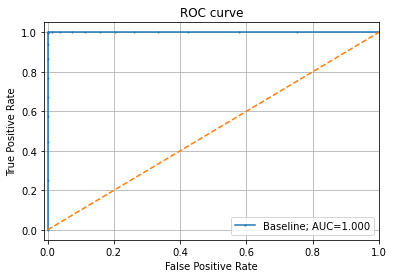

In [0]:
plot_roc(
    [holdout_data.get_label()],
    [model.predict_proba(holdout_data)[:,1]],
    ['Baseline']
)

In [0]:
def plot_importances(model, holdout_data, features):
    shap_values = model.get_feature_importance(holdout_data, type='ShapValues')
    expected_value = shap_values[0,-1]
    shap_values = shap_values[:,:-1]
    shap.summary_plot(shap_values, holdout_data, feature_names=features, plot_type='bar')

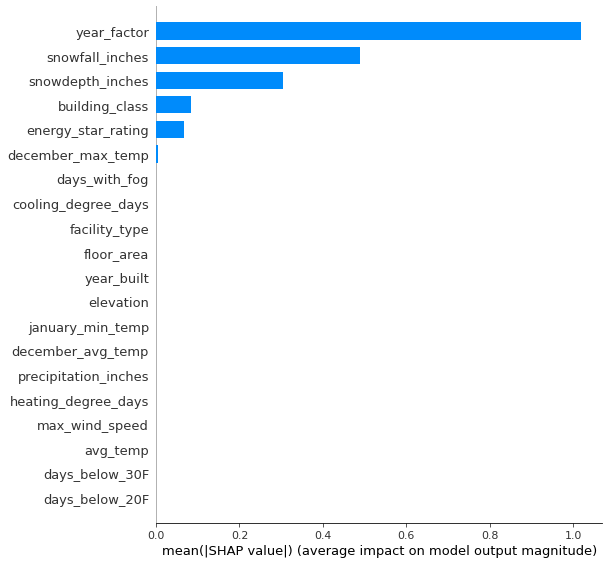

In [0]:
plot_importances(model, holdout_data, features)

In [0]:
del adversarial_train['snowdepth_inches']
del adversarial_test['snowdepth_inches']

del adversarial_train['year_factor']
del adversarial_test['year_factor']

del adversarial_train['snowfall_inches']
del adversarial_test['snowfall_inches']


numeric_cols.remove('snowdepth_inches')
numeric_cols.remove('year_factor')
numeric_cols.remove('snowfall_inches')


In [0]:
features = cat_cols + numeric_cols
all_cols = features + [target]

In [0]:
train_data = Pool(
    data=adversarial_train[features],
    label=adversarial_train[target],
    cat_features=cat_cols
)
holdout_data = Pool(
    data=adversarial_test[features],
    label=adversarial_test[target],
    cat_features=cat_cols
)

In [0]:
params = {
    'iterations': 20,
    'eval_metric': 'AUC',
    'od_type': 'Iter',
    'od_wait': 50,
}

model = CatBoostClassifier(**params)
_ = model.fit(train_data, eval_set=holdout_data)

Learning rate set to 0.41952
0:	test: 0.9970817	best: 0.9970817 (0)	total: 39.8ms	remaining: 757ms
1:	test: 0.9997311	best: 0.9997311 (1)	total: 47.4ms	remaining: 426ms
2:	test: 0.9999555	best: 0.9999555 (2)	total: 55.7ms	remaining: 316ms
3:	test: 0.9999886	best: 0.9999886 (3)	total: 63.1ms	remaining: 252ms
4:	test: 0.9999982	best: 0.9999982 (4)	total: 71.1ms	remaining: 213ms
5:	test: 0.9999985	best: 0.9999985 (5)	total: 79.2ms	remaining: 185ms
6:	test: 0.9999987	best: 0.9999987 (6)	total: 87.4ms	remaining: 162ms
7:	test: 0.9999995	best: 0.9999995 (7)	total: 95ms	remaining: 143ms
8:	test: 0.9999941	best: 0.9999995 (7)	total: 107ms	remaining: 131ms
9:	test: 0.9999941	best: 0.9999995 (7)	total: 113ms	remaining: 113ms
10:	test: 0.9999945	best: 0.9999995 (7)	total: 121ms	remaining: 98.9ms
11:	test: 0.9999996	best: 0.9999996 (11)	total: 128ms	remaining: 85.5ms
12:	test: 0.9999997	best: 0.9999997 (12)	total: 136ms	remaining: 73.3ms
13:	test: 0.9999998	best: 0.9999998 (13)	total: 146ms	remain

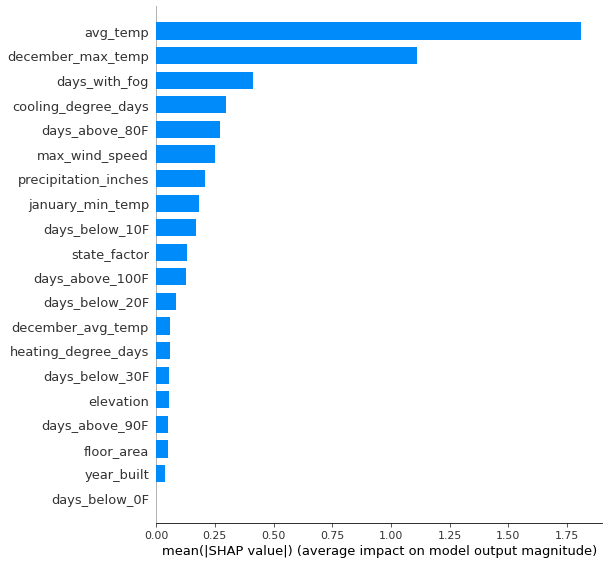

In [0]:
plot_importances(model, holdout_data, features)